In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
from dataPath import MODEL_PATH
%matplotlib inline

ModuleNotFoundError: No module named 'dataPath'

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [2]:
MODEL_PATH = 'models/'
modelFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = MODEL_PATH + "coco_class_labels.txt"

In [ ]:
print (modelFile)

The steps involved in detecting objects using the DNN module are as follows : 
1. Load the model and input image to memory.
1. Detect objects using the forward method of the network
1. Display the detected objects

In [5]:
# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [6]:
with open(classFile) as fp:
    labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [7]:
# For ach file in the directory
def detect_objects(net, im):
    # Blob dimension (dim x dim)
    dim = 300

    mean = (127.5, 127.5, 127.5)
    
    # The blobFromImage functions will use True for swapRB flag. 
    # This is because Tensorflow uses RGB format whereas Caffe and OpenCV use BGR format.
    swap_rgb = True
    
    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(im, 1.0/127.5, (dim, dim), mean, swap_rgb)
    

    # Pass blob to the network
    net.setInput(blob)
    
    # Peform Prediction
    objects = net.forward()
    return objects


This is just a utility function used for displaying the object class Name on the image.

In [8]:
def display_text(im, text, x, y):
    
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a black rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)


In [11]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects(im, objects, threshold = 0.25):

    rows = im.shape[0]; cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Find the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Recover original cordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.show();

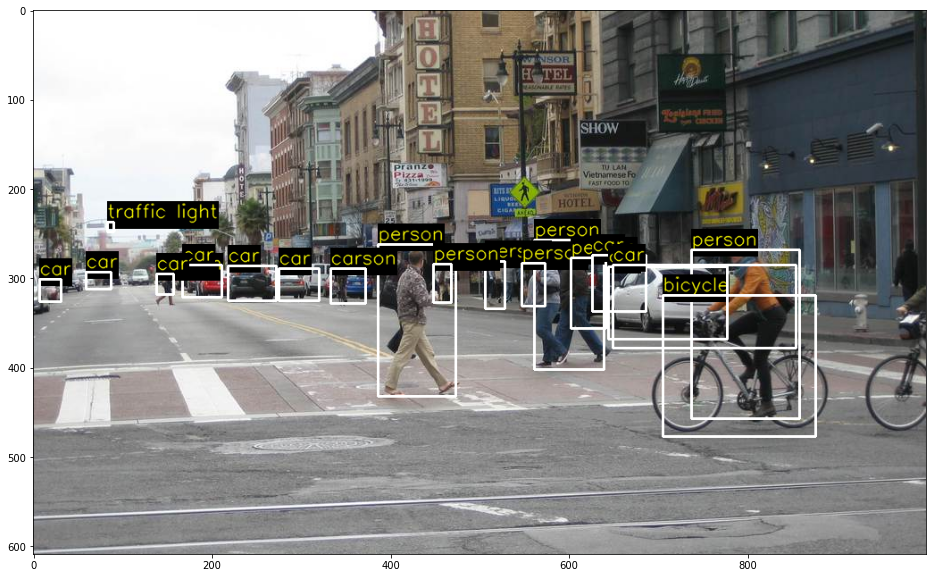

In [14]:
im = cv2.imread('data/images/street.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

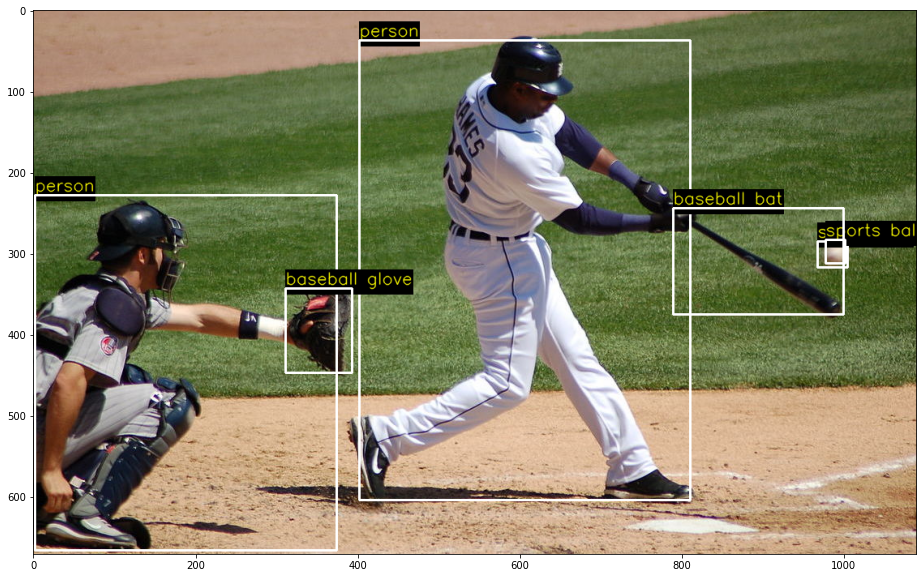

In [15]:
im = cv2.imread('data/images/baseball.jpg')
objects = detect_objects(net, im)
display_objects(im, objects, 0.2)

In [ ]:
im = cv2.imread(DATA_PATH + 'images/soccer.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

## <font style="color:rgb(50,120,229)">Use a different Model from Tensorflow </font>
What if you wanted to use a different model from Tensorflow in OpenCV. Just follow the steps given below.

### <font style="color:rgb(8,133,37)">1. Check out the Tensorflow model ZOO</font>

Model files can be downloaded from the Tensorflow Object Detection Model Zoo
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md

### <font style="color:rgb(8,133,37)">2. Download model file</font>
You can download the model file as a zip archive. For example, for the above example, we download the following file:
http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

### <font style="color:rgb(8,133,37)">Folder Structure </font>
After you uncompress the zip file, it should look similar to this:

**ssd_mobilenet_v2_coco_2018_03_29** <br>
|─ checkpoint <br>
|─ **frozen_inference_graph.pb** <br>
|─ model.ckpt.data-00000-of-00001 <br>
|─ model.ckpt.index <br>
|─ model.ckpt.meta <br>
|─ pipeline.config <br>
|─ saved_model <br>
|─── saved_model.pb <br>
|─── variables <br>

The .pb file is the one that is to be used in OpenCV which contains the frozen weights.

### <font style="color:rgb(8,133,37)">Create config file from frozen graph</font>
If you need to create a config file to be used alog with the model file, then just Run the [tf_text_graph_ssd.py](https://github.com/opencv/opencv/blob/master/samples/dnn/tf_text_graph_ssd.py) file with input as the path to the frozen_graph.pb file and output as desired.

